<b>Importing Necessary Packages</b>

In [67]:
import pandas as pd
import numpy as np
import re

<b>Loading DataFrames from Files</b>

In [68]:
# Provided Dataframe
df1 = pd.read_csv('bom.movie_gross.csv.gz')
df1

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [69]:
# Provided Dataframe
df2 = pd.read_csv('imdb.title.basics.csv.gz')
df2

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,NaN


In [70]:
# Provided Dataframe
df3 = pd.read_csv('tn.movie_budgets.csv.gz')
df3

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [71]:
# Web-Scraped DataFrame
df4 = pd.read_csv('numbers_df.csv')
df4

,release_date,title,genres,production_budget,domestic_gross,foreign_gross,worldwide_gross
0,2010-06-18,Toy Story 3,Adventure,200000000.0,415004880,6.538746e+08,1.068880e+09
1,2009-12-18,Avatar,Action,237000000.0,408392727,2.028194e+09,2.788701e+09
2,2010-03-05,Alice in Wonderland,Adventure,200000000.0,334191110,6.913000e+08,1.025491e+09
3,2010-03-05,Alice in Wonderland,Adventure,3000000.0,334191110,0.000000e+00,0.000000e+00
4,2010-05-07,Iron Man 2,Action,170000000.0,312433331,3.087231e+08,6.211564e+08
...,...,...,...,...,...,...,...
7512,2018-11-09,Chef Flynn,Documentary,NaN,721,NaN,NaN
7513,2018-09-07,I am Not a Witch,Drama,NaN,550,NaN,NaN
7514,2018-12-07,Divide and Conquer: The Sto…,Documentary,NaN,474,NaN,NaN
7515,1968-07-08,Senso,Drama,NaN,437,NaN,NaN


In [72]:
# API DataFrame
df5 = pd.read_csv('2010-2019.csv')
df5

,Unnamed: 0,imdb_id,release_date,genres,title,budget,revenue,runtime_mins,vote_average,vote_count
0,0,tt1375666,2010-07-15,"['Action', 'Science Fiction', 'Adventure']",Inception,160000000,825532764,148,8.3,26451
1,1,tt0926084,2010-10-17,"['Adventure', 'Fantasy']",Harry Potter and the Deathly Hallows: Part 1,250000000,954305868,146,7.8,13048
2,2,tt0435761,2010-06-16,"['Animation', 'Family', 'Comedy']",Toy Story 3,200000000,1066969703,103,7.8,10426
3,3,tt1130884,2010-02-14,"['Drama', 'Thriller', 'Mystery']",Shutter Island,80000000,294804195,138,8.1,15891
4,4,tt1228705,2010-04-28,"['Adventure', 'Action', 'Science Fiction']",Iron Man 2,200000000,623933331,124,6.8,14649
...,...,...,...,...,...,...,...,...,...,...
1185,1185,tt7043012,2019-02-01,"['Thriller', 'Mystery', 'Horror']",Velvet Buzzsaw,21000000,0,113,5.3,1266
1186,1186,tt4332232,2019-09-22,['Thriller'],Fractured,0,0,100,6.6,1155
1187,1187,tt0837563,2019-04-04,"['Thriller', 'Horror']",Pet Sematary,21000000,112399944,101,5.7,2054
1188,1188,tt7984766,2019-10-11,"['Drama', 'History', 'War']",The King,0,0,140,7.2,1525


<b>Editting Individual DataFrames for Target Data Merging</b>

In [73]:
# Removing and Adjusting Datatype of Columns in df1
df1.drop(['studio', 'year'], axis=1, inplace=True)
df1['domestic_gross'] = pd.to_numeric(df1['domestic_gross'], errors='coerce')
df1['foreign_gross'] = pd.to_numeric(df1['foreign_gross'], errors='coerce')
df1.head()

,title,domestic_gross,foreign_gross
0,Toy Story 3,415000000.0,652000000.0
1,Alice in Wonderland (2010),334200000.0,691300000.0
2,Harry Potter and the Deathly Hallows Part 1,296000000.0,664300000.0
3,Inception,292600000.0,535700000.0
4,Shrek Forever After,238700000.0,513900000.0


In [74]:
# Removing and Renaming Columns in df2
df2.drop(['tconst', 'original_title', 'start_year', 'runtime_minutes'], axis=1, inplace=True)
df2 = df2.rename(columns={'primary_title': 'title'})
df2.head()

,title,genres
0,Sunghursh,"Action,Crime,Drama"
1,One Day Before the Rainy Season,"Biography,Drama"
2,The Other Side of the Wind,Drama
3,Sabse Bada Sukh,"Comedy,Drama"
4,The Wandering Soap Opera,"Comedy,Drama,Fantasy"


In [75]:
# Removing, Renaming, and Adjusting Datatype of Columns in df3
df3.drop(['id'], axis=1, inplace=True)
df3['release_date'] = pd.to_datetime(df3['release_date'])
df3.sort_values('release_date', inplace = True)
df3 = df3.rename(columns={'movie': 'title'})
df3[df3.columns[2:]] = df3[df3.columns[2:]].replace('[\$,]', '', regex=True).astype(float)
df3.head()

<>:6: DeprecationWarning: invalid escape sequence \$


,release_date,title,production_budget,domestic_gross,worldwide_gross
5677,1915-02-08,The Birth of a Nation,110000.0,10000000.0,11000000.0
5523,1916-09-05,Intolerance,385907.0,0.0,0.0
5614,1916-12-24,"20,000 Leagues Under the Sea",200000.0,8000000.0,8000000.0
5683,1920-09-17,Over the Hill to the Poorhouse,100000.0,3000000.0,3000000.0
5606,1925-11-19,The Big Parade,245000.0,11000000.0,22000000.0


In [76]:
# Adjusting Datatype of Columns in df4
df4.sort_values('release_date', inplace = True)
df4.head()

,release_date,title,genres,production_budget,domestic_gross,foreign_gross,worldwide_gross
5301,1926-01-07,Moana,Documentary,150000000.0,2993,387870379.0,636627423.0
984,1927-03-13,Metropolis,Action,15000000.0,556412,731618.0,1405032.0
1866,1938-09-12,La Grande Illusion,NaN,NaN,71641,NaN,NaN
5291,1942-12-25,Arabian Nights,Adventure,NaN,3719,NaN,NaN
7506,1945-11-30,Detour,Drama,NaN,1540,NaN,NaN


In [77]:
# Removing, Renaming, and Formatting Columns in df5
df5.drop(['Unnamed: 0', 'imdb_id', 'runtime_mins', 'vote_average', 'vote_count'], axis=1, inplace=True)
df5 = df5.rename(columns={'movie': 'title', 'genre': 'genres', 'budget': 'production_budget', 'revenue': 'worldwide_gross'})
df5['genres'] = df5['genres'].str.strip('[]')
df5['genres'] = df5['genres'].str.replace("'", "")
df5['genres'] = df5['genres'].str.replace(" ", "")
df5.head()

,release_date,genres,title,production_budget,worldwide_gross
0,2010-07-15,"Action,ScienceFiction,Adventure",Inception,160000000,825532764
1,2010-10-17,"Adventure,Fantasy",Harry Potter and the Deathly Hallows: Part 1,250000000,954305868
2,2010-06-16,"Animation,Family,Comedy",Toy Story 3,200000000,1066969703
3,2010-02-14,"Drama,Thriller,Mystery",Shutter Island,80000000,294804195
4,2010-04-28,"Adventure,Action,ScienceFiction",Iron Man 2,200000000,623933331


<b>Merging DataFrames</b>
<br>Merging outer to compare data before filtering process.

In [78]:
# Merging df1 and df2
merged_df1 = pd.merge(df1, df2, how='outer', on='title')
merged_df1

,title,domestic_gross,foreign_gross,genres
0,Toy Story 3,415000000.0,652000000.0,"Adventure,Animation,Comedy"
1,Alice in Wonderland (2010),334200000.0,691300000.0,NaN
2,Harry Potter and the Deathly Hallows Part 1,296000000.0,664300000.0,NaN
3,Inception,292600000.0,535700000.0,"Action,Adventure,Sci-Fi"
4,Shrek Forever After,238700000.0,513900000.0,"Adventure,Animation,Comedy"
...,...,...,...,...
146922,Kuambil Lagi Hatiku,NaN,NaN,Drama
146923,Rodolpho Teóphilo - O Legado de um Pioneiro,NaN,NaN,Documentary
146924,Dankyavar Danka,NaN,NaN,Comedy
146925,6 Gunn,NaN,NaN,NaN


In [79]:
# Merging df3 to df1/df2
merged_df2 = pd.merge(merged_df1, df3, how='outer', on='title')
# Editting NaN Values for Easier Merging and Data Analysis
merged_df2['domestic_gross_x'] = merged_df2['domestic_gross_x'].replace(np.nan, 0)
merged_df2['foreign_gross'] = merged_df2['foreign_gross'].replace(np.nan, 0)
merged_df2['production_budget'] = merged_df2['production_budget'].replace(np.nan, 0)
merged_df2['domestic_gross_y'] = merged_df2['domestic_gross_y'].replace(np.nan, 0)
merged_df2['worldwide_gross'] = merged_df2['worldwide_gross'].replace(np.nan, 0)
merged_df2

,title,domestic_gross_x,foreign_gross,genres,release_date,production_budget,domestic_gross_y,worldwide_gross
0,Toy Story 3,415000000.0,652000000.0,"Adventure,Animation,Comedy",2010-06-18,200000000.0,415004880.0,1.068880e+09
1,Alice in Wonderland (2010),334200000.0,691300000.0,NaN,NaT,0.0,0.0,0.000000e+00
2,Harry Potter and the Deathly Hallows Part 1,296000000.0,664300000.0,NaN,NaT,0.0,0.0,0.000000e+00
3,Inception,292600000.0,535700000.0,"Action,Adventure,Sci-Fi",2010-07-16,160000000.0,292576195.0,8.355246e+08
4,Shrek Forever After,238700000.0,513900000.0,"Adventure,Animation,Comedy",2010-05-21,165000000.0,238736787.0,7.562447e+08
...,...,...,...,...,...,...,...,...
150457,Army of the Dead,0.0,0.0,NaN,2019-12-31,90000000.0,0.0,0.000000e+00
150458,355,0.0,0.0,NaN,2019-12-31,75000000.0,0.0,0.000000e+00
150459,Down Under Cover,0.0,0.0,NaN,2019-12-31,40000000.0,0.0,0.000000e+00
150460,Hannibal the Conqueror,0.0,0.0,NaN,2020-12-31,50000000.0,0.0,0.000000e+00


In [80]:
# Condensing Columns of df1/df2/df3
merged_df2['domestic_gross'] = merged_df2['domestic_gross_x'].combine(merged_df2['domestic_gross_y'], lambda s1, s2: s1 if s1 > s2 else s2)
merged_df2.drop(['domestic_gross_x', 'domestic_gross_y'], axis=1, inplace=True)
merged_df2.sort_values('release_date', inplace = True)
merged_df2.head()

,title,foreign_gross,genres,release_date,production_budget,worldwide_gross,domestic_gross
80242,The Birth of a Nation,0.0,"Biography,Drama,History",1915-02-08,110000.0,11000000.0,10000000.0
147136,Intolerance,0.0,NaN,1916-09-05,385907.0,0.0,0.0
147137,"20,000 Leagues Under the Sea",0.0,NaN,1916-12-24,200000.0,8000000.0,8000000.0
147139,Over the Hill to the Poorhouse,0.0,NaN,1920-09-17,100000.0,3000000.0,3000000.0
147140,The Big Parade,0.0,NaN,1925-11-19,245000.0,22000000.0,11000000.0


In [81]:
# Merging df4 to df1/df2/df3
merged_df3 = pd.merge(merged_df2, df4, how='outer', on='title')
# Editting NaN Values for Easier Merging and Data Analysis
merged_df3['foreign_gross_x'] = merged_df3['foreign_gross_x'].replace(np.nan, 0)
merged_df3['production_budget_x'] = merged_df3['production_budget_x'].replace(np.nan, 0)
merged_df3['worldwide_gross_x'] = merged_df3['worldwide_gross_x'].replace(np.nan, 0)
merged_df3['domestic_gross_x'] = merged_df3['domestic_gross_x'].replace(np.nan, 0)
merged_df3['production_budget_y'] = merged_df3['production_budget_y'].replace(np.nan, 0)
merged_df3['domestic_gross_y'] = merged_df3['domestic_gross_y'].replace(np.nan, 0)
merged_df3['foreign_gross_y'] = merged_df3['foreign_gross_y'].replace(np.nan, 0)
merged_df3['worldwide_gross_y'] = merged_df3['worldwide_gross_y'].replace(np.nan, 0)
merged_df3

,title,foreign_gross_x,genres_x,release_date_x,production_budget_x,worldwide_gross_x,domestic_gross_x,release_date_y,genres_y,production_budget_y,domestic_gross_y,foreign_gross_y,worldwide_gross_y
0,The Birth of a Nation,0.0,"Biography,Drama,History",1915-02-08,110000.0,11000000.0,10000000.0,2016-10-07,Drama,110000.0,15861566.0,1000000.0,11000000.0
1,The Birth of a Nation,0.0,"Biography,Drama,History",1915-02-08,110000.0,11000000.0,10000000.0,2016-10-07,Drama,10000000.0,15861566.0,1029445.0,16891011.0
2,The Birth of a Nation,0.0,"Biography,Drama,History",2016-10-07,10000000.0,16891011.0,15861566.0,2016-10-07,Drama,110000.0,15861566.0,1000000.0,11000000.0
3,The Birth of a Nation,0.0,"Biography,Drama,History",2016-10-07,10000000.0,16891011.0,15861566.0,2016-10-07,Drama,10000000.0,15861566.0,1029445.0,16891011.0
4,Intolerance,0.0,NaN,1916-09-05,385907.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
154168,Ta-weo,0.0,NaN,NaT,0.0,0.0,0.0,NaN,NaN,0.0,726.0,0.0,0.0
154169,La migiliore offerta,0.0,NaN,NaT,0.0,0.0,0.0,NaN,NaN,0.0,2595.0,0.0,0.0
154170,Campanadas a medianoche,0.0,NaN,NaT,0.0,0.0,0.0,NaN,NaN,0.0,18958.0,0.0,0.0
154171,Omohide poro poro,0.0,NaN,NaT,0.0,0.0,0.0,NaN,NaN,0.0,14970.0,0.0,0.0


In [82]:
# Condensing/Combining Columns of df1/df2/df3/df4
merged_df3['foreign_gross'] = merged_df3['foreign_gross_x'].combine(merged_df3['foreign_gross_y'], lambda s1, s2: s1 if s1 > s2 else s2)
merged_df3.drop(['foreign_gross_x', 'foreign_gross_y'], axis=1, inplace=True)
merged_df3['release_date'] = merged_df3['release_date_x'].combine(merged_df3['release_date_y'], lambda s1, s2: s2 if s1 is None else s1)
merged_df3.drop(['release_date_x', 'release_date_y'], axis=1, inplace=True)
merged_df3['production_budget'] = merged_df3['production_budget_x'].combine(merged_df3['production_budget_y'], lambda s1, s2: s1 if s1 > s2 else s2)
merged_df3.drop(['production_budget_x', 'production_budget_y'], axis=1, inplace=True)
merged_df3['worldwide_gross'] = merged_df3['worldwide_gross_x'].combine(merged_df3['worldwide_gross_y'], lambda s1, s2: s1 if s1 > s2 else s2)
merged_df3.drop(['worldwide_gross_x', 'worldwide_gross_y'], axis=1, inplace=True)
merged_df3['domestic_gross'] = merged_df3['domestic_gross_x'].combine(merged_df3['domestic_gross_y'], lambda s1, s2: s1 if s1 > s2 else s2)
merged_df3.drop(['domestic_gross_x', 'domestic_gross_y'], axis=1, inplace=True)
merged_df3['genres'] = merged_df3['genres_x'].str.cat(merged_df3['genres_y'], sep = ',')
merged_df3.drop(['genres_x', 'genres_y'], axis=1, inplace=True)
merged_df3.sort_values('release_date', inplace = True)
merged_df3.head()

,title,foreign_gross,release_date,production_budget,worldwide_gross,domestic_gross,genres
0,The Birth of a Nation,1000000.0,1915-02-08,110000.0,11000000.0,15861566.0,"Biography,Drama,History,Drama"
1,The Birth of a Nation,1029445.0,1915-02-08,10000000.0,16891011.0,15861566.0,"Biography,Drama,History,Drama"
4,Intolerance,0.0,1916-09-05,385907.0,0.0,0.0,NaN
5,"20,000 Leagues Under the Sea",0.0,1916-12-24,200000.0,8000000.0,8000000.0,NaN
7,Over the Hill to the Poorhouse,0.0,1920-09-17,100000.0,3000000.0,3000000.0,NaN


In [83]:
# Merging df5 to df1/df2/df3/d4
merged_df4 = pd.merge(merged_df3, df5, how='outer', on='title')
# Editting NaN Values for Easier Merging and Data Analysis
merged_df4['foreign_gross'] = merged_df4['foreign_gross'].replace(np.nan, 0)
merged_df4['production_budget_x'] = merged_df4['production_budget_x'].replace(np.nan, 0)
merged_df4['worldwide_gross_x'] = merged_df4['worldwide_gross_x'].replace(np.nan, 0)
merged_df4['domestic_gross'] = merged_df4['domestic_gross'].replace(np.nan, 0)
merged_df4['production_budget_y'] = merged_df4['production_budget_y'].replace(np.nan, 0)
merged_df4['worldwide_gross_y'] = merged_df4['worldwide_gross_y'].replace(np.nan, 0)
merged_df4

,title,foreign_gross,release_date_x,production_budget_x,worldwide_gross_x,domestic_gross,genres_x,release_date_y,genres_y,production_budget_y,worldwide_gross_y
0,The Birth of a Nation,1000000.0,1915-02-08,110000.0,11000000.0,15861566.0,"Biography,Drama,History,Drama",NaN,NaN,0.0,0.0
1,The Birth of a Nation,1029445.0,1915-02-08,10000000.0,16891011.0,15861566.0,"Biography,Drama,History,Drama",NaN,NaN,0.0,0.0
2,The Birth of a Nation,1029445.0,2016-10-07,10000000.0,16891011.0,15861566.0,"Biography,Drama,History,Drama",NaN,NaN,0.0,0.0
3,The Birth of a Nation,1000000.0,2016-10-07,10000000.0,16891011.0,15861566.0,"Biography,Drama,History,Drama",NaN,NaN,0.0,0.0
4,Intolerance,0.0,1916-09-05,385907.0,0.0,0.0,NaN,NaN,NaN,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
154297,El Camino: A Breaking Bad Movie,0.0,NaT,0.0,0.0,0.0,NaN,2019-10-11,"Crime,Drama,Thriller,Action",6000000.0,0.0
154298,Once Upon a Time… in Hollywood,0.0,NaT,0.0,0.0,0.0,NaN,2019-07-24,"Comedy,Drama,Thriller",95000000.0,374251247.0
154299,The Platform,0.0,NaT,0.0,0.0,0.0,NaN,2019-11-08,"Drama,ScienceFiction,Thriller",0.0,0.0
154300,The Two Popes,0.0,NaT,0.0,0.0,0.0,NaN,2019-11-27,"Drama,Comedy,History",0.0,232638.0


In [84]:
# Condensing/Combining Columns of df1/df2/df3/df4/df5
merged_df4['release_date'] = merged_df4['release_date_x'].combine(merged_df4['release_date_y'], lambda s1, s2: s2 if s1 is None else s1)
merged_df4.drop(['release_date_x', 'release_date_y'], axis=1, inplace=True)
merged_df4['production_budget'] = merged_df4['production_budget_x'].combine(merged_df4['production_budget_y'], lambda s1, s2: s1 if s1 > s2 else s2)
merged_df4.drop(['production_budget_x', 'production_budget_y'], axis=1, inplace=True)
merged_df4['worldwide_gross'] = merged_df4['worldwide_gross_x'].combine(merged_df4['worldwide_gross_y'], lambda s1, s2: s1 if s1 > s2 else s2)
merged_df4.drop(['worldwide_gross_x', 'worldwide_gross_y'], axis=1, inplace=True)
merged_df4['genres'] = merged_df4['genres_x'].combine_first(merged_df4['genres_y'])
merged_df4.drop(['genres_x', 'genres_y'], axis=1, inplace=True)
merged_df4.sort_values('release_date', inplace = True)
merged_df4.head()

,title,foreign_gross,domestic_gross,release_date,production_budget,worldwide_gross,genres
0,The Birth of a Nation,1000000.0,15861566.0,1915-02-08,110000.0,11000000.0,"Biography,Drama,History,Drama"
1,The Birth of a Nation,1029445.0,15861566.0,1915-02-08,10000000.0,16891011.0,"Biography,Drama,History,Drama"
4,Intolerance,0.0,0.0,1916-09-05,385907.0,0.0,NaN
5,"20,000 Leagues Under the Sea",0.0,8000000.0,1916-12-24,200000.0,8000000.0,NaN
7,Over the Hill to the Poorhouse,0.0,3000000.0,1920-09-17,100000.0,3000000.0,NaN


<b>Calculating Return On Investment (ROI)</b>

In [85]:
# Creating Function for ROI
def roi (gross, budget):
    percentage = (gross-budget)/budget * 100
    return (percentage)

In [86]:
#merged_df3['domestic_roi'] = roi(merged_df3['domestic_gross'], merged_df3['production_budget'])
#merged_df3['foreign_roi'] = roi(merged_df3['foreign_gross'], merged_df3['production_budget'])
merged_df4['roi'] = roi(merged_df3['worldwide_gross'], merged_df3['production_budget'])

<b>Cleaning the Data</b>

In [87]:
# Removing Null/0 Data
merged_df4 = merged_df4.dropna()
merged_df4 = merged_df4[(merged_df4 != 0).all(1)]
merged_df4

,title,foreign_gross,domestic_gross,release_date,production_budget,worldwide_gross,genres,roi
0,The Birth of a Nation,1000000.0,15861566.0,1915-02-08,110000.0,1.100000e+07,"Biography,Drama,History,Drama",9900.000000
1,The Birth of a Nation,1029445.0,15861566.0,1915-02-08,10000000.0,1.689101e+07,"Biography,Drama,History,Drama",68.910110
79,Cinderella,178591415.0,201151353.0,1950-02-15,95000000.0,5.435144e+08,"Musical,Drama",462.685635
80,Cinderella,333400000.0,201151353.0,1950-02-15,95000000.0,5.435144e+08,"Musical,Drama",8989.359138
81,Cinderella,178591415.0,201151353.0,1950-02-15,95000000.0,5.435144e+08,"Drama,Drama",462.685635
...,...,...,...,...,...,...,...,...
1049,Aladdin,695400000.0,355559216.0,2019-05-24,183000000.0,1.050959e+09,"Fantasy,Adventure",-50.369269
1048,Aladdin,286700000.0,355559216.0,2019-05-24,183000000.0,1.047612e+09,"Fantasy,Adventure",292.307692
1047,Aladdin,695400000.0,355559216.0,2019-05-24,183000000.0,1.050959e+09,"Adventure,Comedy,Family,Adventure",692.329343
1046,Aladdin,286700000.0,355559216.0,2019-05-24,183000000.0,1.047612e+09,"Adventure,Comedy,Family,Adventure",-91.137562


In [88]:
# Adjusting Numerical Data (Per Million Dollars)
merged_df4['foreign_gross'] = merged_df4['foreign_gross'].div(1000000)
merged_df4['domestic_gross'] = merged_df4['domestic_gross'].div(1000000)
merged_df4['production_budget'] = merged_df4['production_budget'].div(1000000)
merged_df4['worldwide_gross'] = merged_df4['worldwide_gross'].div(1000000)
merged_df4

,title,foreign_gross,domestic_gross,release_date,production_budget,worldwide_gross,genres,roi
0,The Birth of a Nation,1.000000,15.861566,1915-02-08,0.110000,11.000000,"Biography,Drama,History,Drama",9900.000000
1,The Birth of a Nation,1.029445,15.861566,1915-02-08,10.000000,16.891011,"Biography,Drama,History,Drama",68.910110
79,Cinderella,178.591415,201.151353,1950-02-15,95.000000,543.514353,"Musical,Drama",462.685635
80,Cinderella,333.400000,201.151353,1950-02-15,95.000000,543.514353,"Musical,Drama",8989.359138
81,Cinderella,178.591415,201.151353,1950-02-15,95.000000,543.514353,"Drama,Drama",462.685635
...,...,...,...,...,...,...,...,...
1049,Aladdin,695.400000,355.559216,2019-05-24,183.000000,1050.959216,"Fantasy,Adventure",-50.369269
1048,Aladdin,286.700000,355.559216,2019-05-24,183.000000,1047.612394,"Fantasy,Adventure",292.307692
1047,Aladdin,695.400000,355.559216,2019-05-24,183.000000,1050.959216,"Adventure,Comedy,Family,Adventure",692.329343
1046,Aladdin,286.700000,355.559216,2019-05-24,183.000000,1047.612394,"Adventure,Comedy,Family,Adventure",-91.137562


In [89]:
# Removing Movies Released Before 2010
merged_df4.drop(merged_df4[merged_df4['release_date'] < '2010-01-01'].index, inplace=True)
merged_df4

,title,foreign_gross,domestic_gross,release_date,production_budget,worldwide_gross,genres,roi
5158,Leap Year,6.700000,25.918920,2010-01-08,19.000000,32.618920,"Comedy,Romance,Drama",274.327227
5157,Leap Year,6.700000,25.918920,2010-01-08,19.000000,32.618920,"Comedy,Romance,Romantic Comedy",-98.814347
5155,Leap Year,6.700000,25.918920,2010-01-08,19.000000,32.618920,"Drama,Romance,Romantic Comedy",74.465220
5156,Leap Year,6.700000,25.918920,2010-01-08,19.000000,32.618920,"Drama,Romance,Drama",-98.935400
5161,The Last Station,9.078279,6.617867,2010-01-15,18.000000,15.696146,"Drama,Drama",197.081758
...,...,...,...,...,...,...,...,...
1049,Aladdin,695.400000,355.559216,2019-05-24,183.000000,1050.959216,"Fantasy,Adventure",-50.369269
1048,Aladdin,286.700000,355.559216,2019-05-24,183.000000,1047.612394,"Fantasy,Adventure",292.307692
1047,Aladdin,695.400000,355.559216,2019-05-24,183.000000,1050.959216,"Adventure,Comedy,Family,Adventure",692.329343
1046,Aladdin,286.700000,355.559216,2019-05-24,183.000000,1047.612394,"Adventure,Comedy,Family,Adventure",-91.137562


In [90]:
# Removing Movies Below 175% ROI
merged_df4.drop(merged_df4[merged_df4['roi'] < 175].index, inplace=True)
merged_df4

,title,foreign_gross,domestic_gross,release_date,production_budget,worldwide_gross,genres,roi
5158,Leap Year,6.700000,25.918920,2010-01-08,19.0,32.618920,"Comedy,Romance,Drama",274.327227
5161,The Last Station,9.078279,6.617867,2010-01-15,18.0,15.696146,"Drama,Drama",197.081758
5167,Tooth Fairy,52.400000,60.022256,2010-01-22,48.0,112.610386,"Comedy,Family,Fantasy",198.171356
5171,Legion,27.479494,40.168080,2010-01-22,26.0,67.918658,"Action,Fantasy,Horror,Thriller/Suspense",253.163250
5188,The Wolfman,77.800000,62.189884,2010-02-12,150.0,142.634358,Horror,199.921813
...,...,...,...,...,...,...,...,...
8706,The Favourite,61.600000,34.400000,2018-11-23,15.0,95.872148,"Biography,Drama,History,Black Comedy",429.460918
802,Pet Sematary,54.776450,54.724696,2019-04-05,21.0,112.399944,"Horror,Mystery,Thriller,Horror",421.434029
3125,Hellboy,40.200000,21.903748,2019-04-12,60.0,99.823958,"Action,Adventure,Fantasy,Horror",316.189100
1048,Aladdin,286.700000,355.559216,2019-05-24,183.0,1047.612394,"Fantasy,Adventure",292.307692


In [91]:
# Fixing Genres
merged_df4['genres'] = merged_df4['genres'].str.split(pat=",")
s = merged_df4.apply(lambda x: pd.Series(x['genres']),axis=1).stack().reset_index(level=1, drop=True)
s.name = 'genre'
merged_df4 = merged_df4.drop('genres',axis=1).join(s)
merged_df4

,title,foreign_gross,domestic_gross,release_date,production_budget,worldwide_gross,roi,genre
88,Cinderella,333.400000,201.151353,2015-03-13,95.0,543.514353,462.685635,Comedy
88,Cinderella,333.400000,201.151353,2015-03-13,95.0,543.514353,462.685635,Fantasy
88,Cinderella,333.400000,201.151353,2015-03-13,95.0,543.514353,462.685635,Drama
89,Cinderella,178.591415,201.151353,2015-03-13,95.0,543.514353,462.685635,Comedy
89,Cinderella,178.591415,201.151353,2015-03-13,95.0,543.514353,462.685635,Fantasy
...,...,...,...,...,...,...,...,...
8705,The Favourite,61.600000,34.400000,2018-11-23,15.0,95.872148,429.460918,Black Comedy
8706,The Favourite,61.600000,34.400000,2018-11-23,15.0,95.872148,429.460918,Biography
8706,The Favourite,61.600000,34.400000,2018-11-23,15.0,95.872148,429.460918,Drama
8706,The Favourite,61.600000,34.400000,2018-11-23,15.0,95.872148,429.460918,History


In [92]:
# Getting Rid of Duplicates
merged_df4 = merged_df4.drop_duplicates(subset=['title','genre'])
merged_df4

,title,foreign_gross,domestic_gross,release_date,production_budget,worldwide_gross,roi,genre
88,Cinderella,333.400000,201.151353,2015-03-13,95.0,543.514353,462.685635,Comedy
88,Cinderella,333.400000,201.151353,2015-03-13,95.0,543.514353,462.685635,Fantasy
88,Cinderella,333.400000,201.151353,2015-03-13,95.0,543.514353,462.685635,Drama
93,Cinderella,178.591415,201.151353,2015-03-13,95.0,543.514353,462.685635,Musical
95,Cinderella,333.400000,201.151353,2015-03-13,95.0,543.514353,462.685635,Music
...,...,...,...,...,...,...,...,...
8697,Widows,33.600000,42.402632,2018-11-16,42.0,73.866088,372.588766,Comedy
8705,The Favourite,61.600000,34.400000,2018-11-23,15.0,95.872148,429.460918,Biography
8705,The Favourite,61.600000,34.400000,2018-11-23,15.0,95.872148,429.460918,Drama
8705,The Favourite,61.600000,34.400000,2018-11-23,15.0,95.872148,429.460918,History


<b>Finalizing the DataFrame</b>

In [93]:
columnsorder = ['release_date', 'title', 'genre', 'production_budget', 'domestic_gross', 
                'foreign_gross', 'worldwide_gross', 'roi']
final_df = merged_df4.reindex(columns=columnsorder)
final_df = final_df.sort_values('release_date', ignore_index=True)

In [94]:
final_df.to_csv('MoviesDataFrame.csv', index=False)

In [95]:
presentation_df = final_df.rename(columns={'release_date': 'Release Date', 'title': 'Title',
                                           'genre': 'Genre', 'production_budget': 'Production Budget', 
                                           'domestic_gross': 'Domestic Gross', 'foreign_gross': 'Foreign Gross', 
                                           'worldwide_gross': 'Worldwide Gross', 'roi': 'ROI'})
presentation_df.head()

,Release Date,Title,Genre,Production Budget,Domestic Gross,Foreign Gross,Worldwide Gross,ROI
0,2010-01-08,Leap Year,Comedy,19.0,25.918920,6.700000,32.618920,274.327227
1,2010-01-08,Leap Year,Drama,19.0,25.918920,6.700000,32.618920,274.327227
2,2010-01-08,Leap Year,Romance,19.0,25.918920,6.700000,32.618920,274.327227
3,2010-01-15,The Last Station,Drama,18.0,6.617867,9.078279,15.696146,197.081758
4,2010-01-22,Legion,Action,26.0,40.168080,27.479494,67.918658,253.163250


In [96]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings; warnings.filterwarnings(action='once')

large = 22; med = 16; small = 12
params = {'axes.titlesize': large,
          'legend.fontsize': med,
          'figure.figsize': (16, 10),
          'axes.labelsize': med,
          'axes.titlesize': med,
          'xtick.labelsize': med,
          'ytick.labelsize': med,
          'figure.titlesize': large}
plt.rcParams.update(params)
plt.style.use('seaborn-whitegrid')
sns.set_style("white")
%matplotlib inline

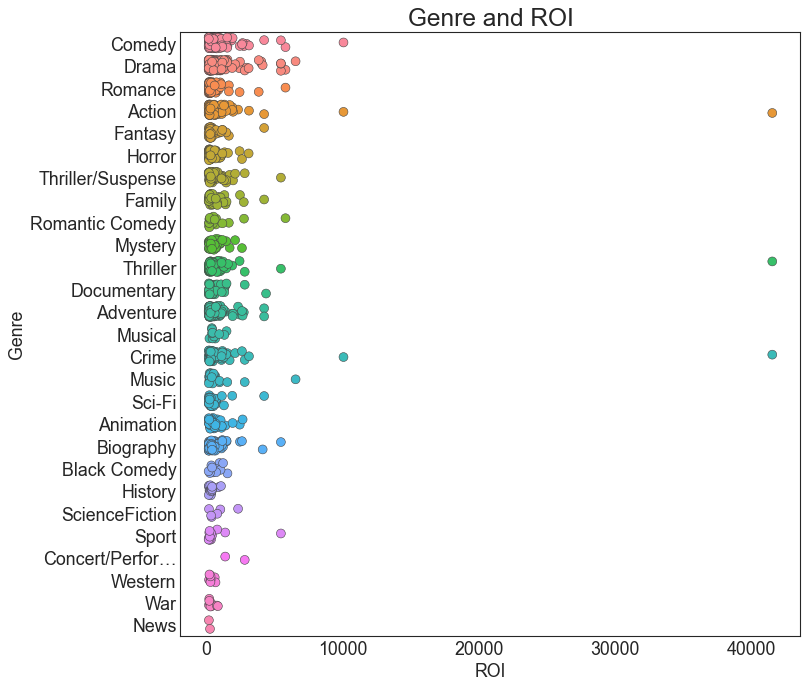

In [97]:
# Draw Stripplot
fig, ax = plt.subplots(figsize=(10,10), dpi= 80)    
sns.stripplot(presentation_df['ROI'], presentation_df['Genre'], jitter=0.25, size=8, ax=ax, linewidth=.5)

# Decorations
plt.title('Genre and ROI', fontsize=22)

plt.show()

In [98]:
#dropping outliers
presentation_df.drop(presentation_df[presentation_df['ROI'] > 2250].index, inplace=True)

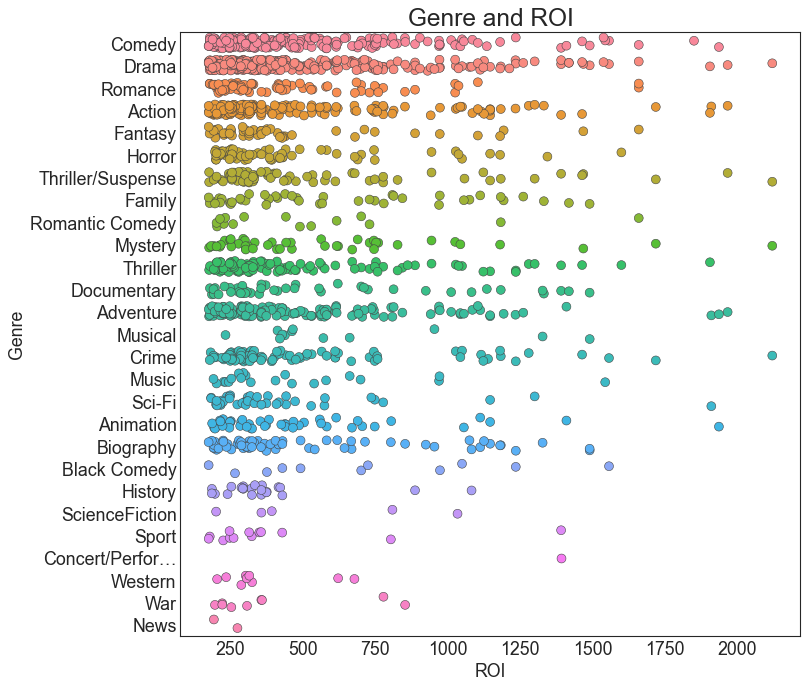

In [99]:
# Draw Stripplot
fig, ax = plt.subplots(figsize=(10,10), dpi= 80)    
sns.stripplot(presentation_df['ROI'], presentation_df['Genre'], jitter=0.25, size=8, ax=ax, linewidth=.5)

# Decorations
plt.title('Genre and ROI', fontsize=22)

plt.show()

/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


<Figure size 2400x3200 with 0 Axes>

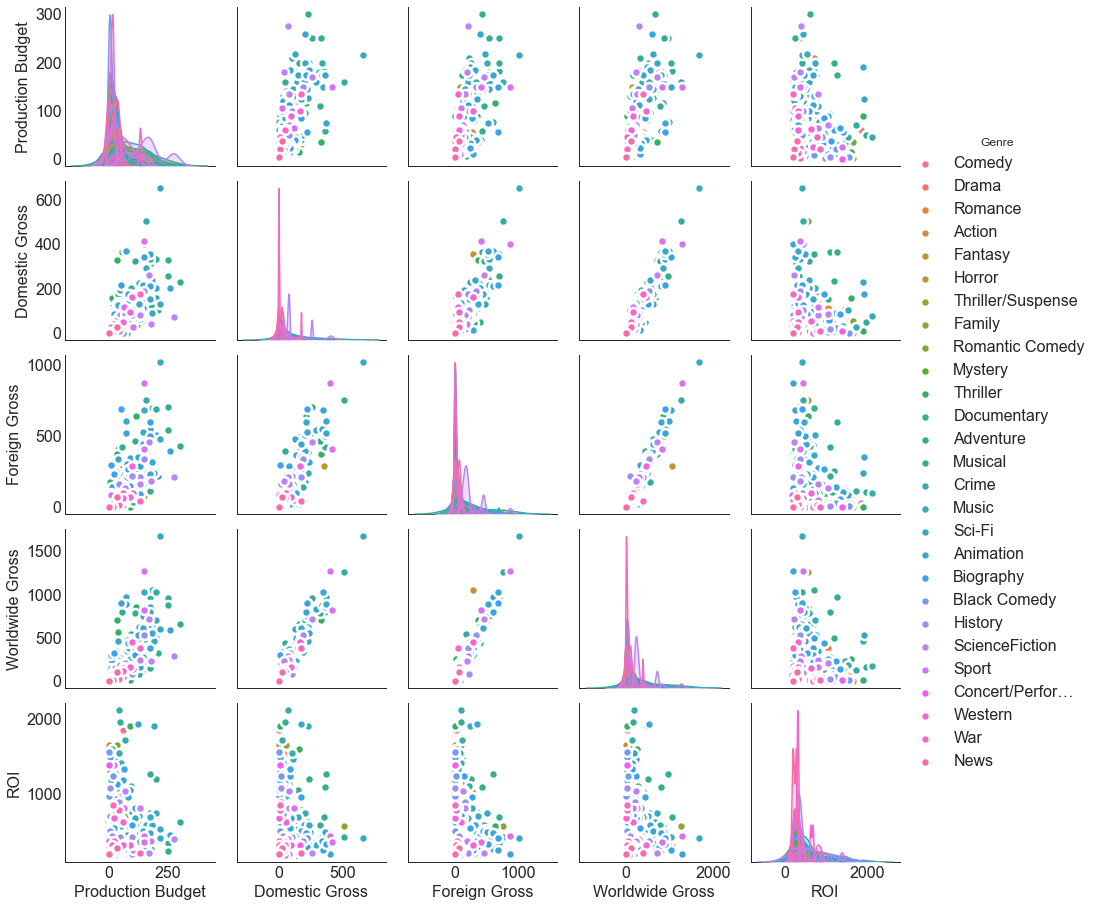

In [100]:
# Load Dataset

# Plot
plt.figure(figsize=(6,8), dpi= 400)
sns.pairplot(presentation_df, kind="scatter", hue="Genre", plot_kws=dict(s=80, edgecolor="white", linewidth=2.5))
plt.show()

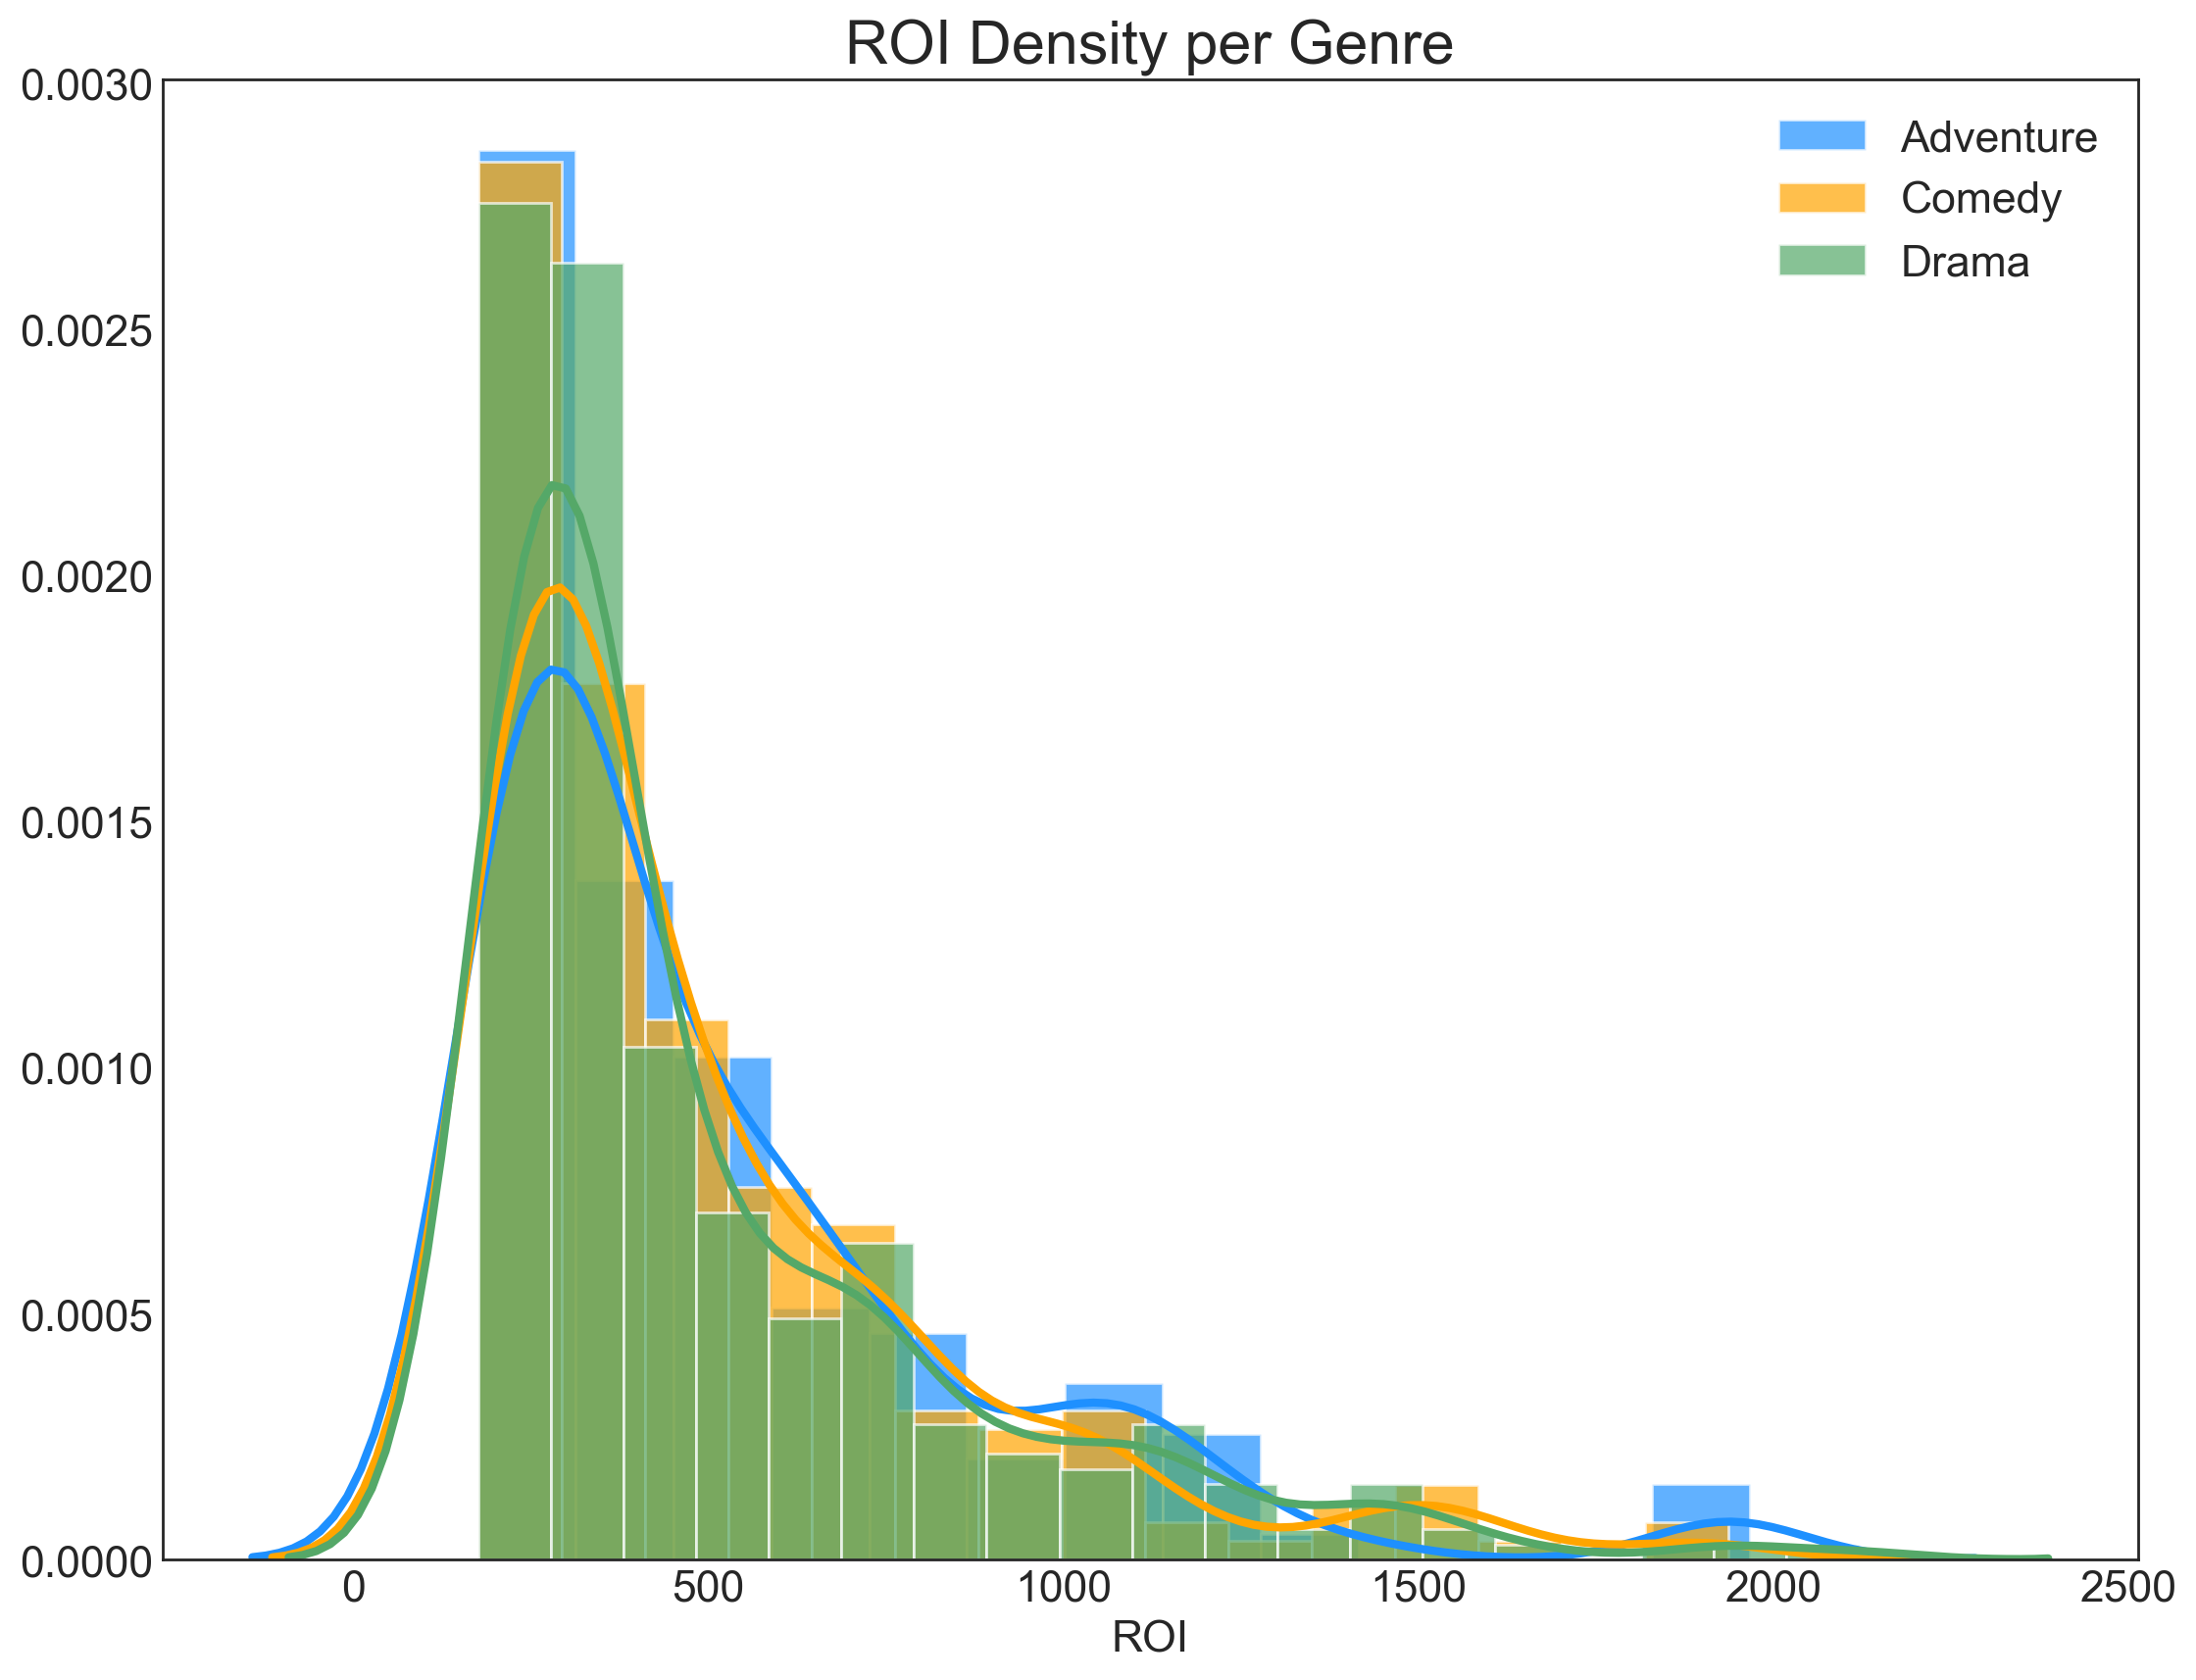

In [101]:



plt.figure(figsize=(13,10), dpi= 200)
sns.distplot(presentation_df.loc[presentation_df['Genre'] == 'Adventure', "ROI"], color="dodgerblue", label="Adventure", hist_kws={'alpha':.7}, kde_kws={'linewidth':3})
sns.distplot(presentation_df.loc[presentation_df['Genre'] == 'Comedy', "ROI"], color="orange", label="Comedy", hist_kws={'alpha':.7}, kde_kws={'linewidth':3})
sns.distplot(presentation_df.loc[presentation_df['Genre'] == 'Drama', "ROI"], color="g", label="Drama", hist_kws={'alpha':.7}, kde_kws={'linewidth':3})



plt.title('ROI Density per Genre', fontsize=22)
plt.legend()
plt.show()

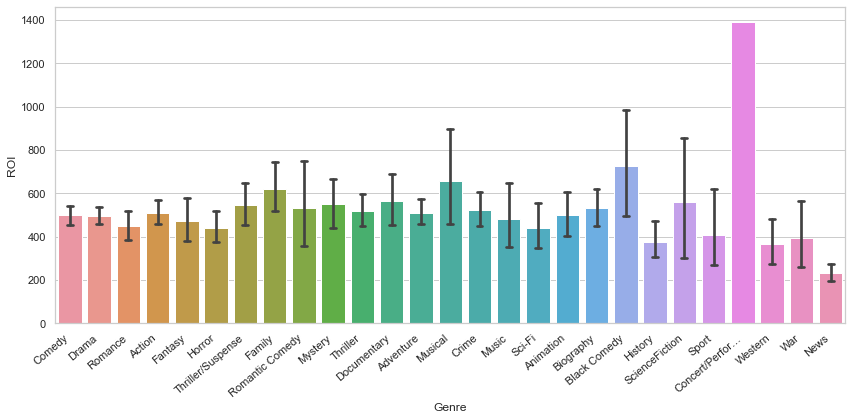

In [102]:
sns.set(style="whitegrid")
plt.figure(figsize=(12,6))
ax = sns.barplot(x="Genre", y="ROI", data=presentation_df, capsize=.2)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

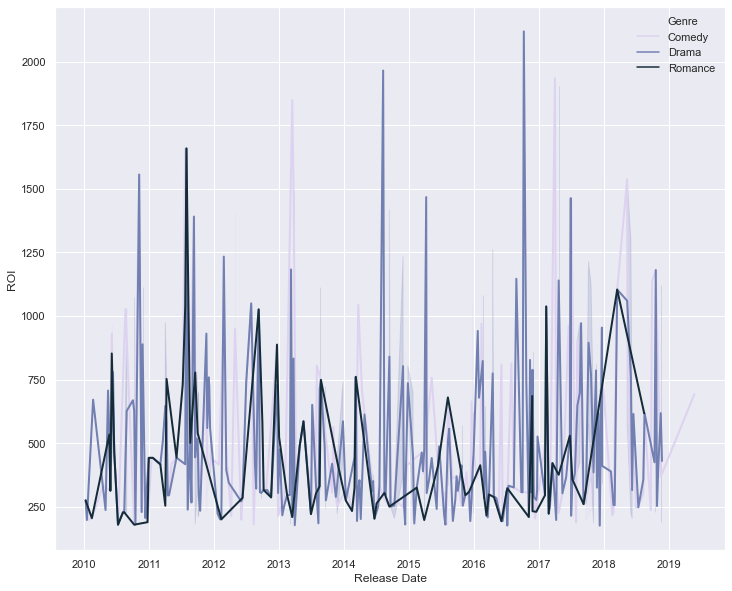

In [103]:
from numpy import median
sns.set(style="darkgrid")
plt.figure(figsize=(12,10))
sns.lineplot(x="Release Date", y="ROI",
             hue="Genre", hue_order=['Comedy', 'Drama','Romance'],
             estimator=np.mean, err_style="band", 
             data=presentation_df, palette="ch:2.5,.25", linewidth=2.0)

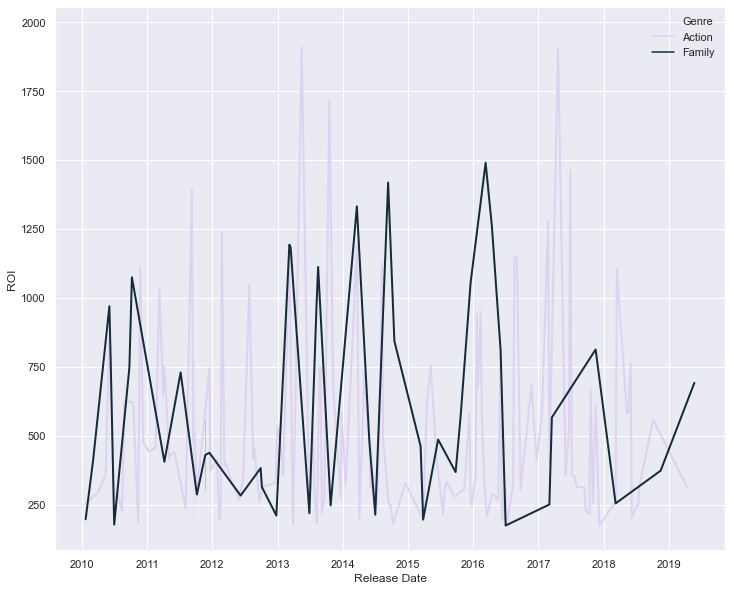

In [104]:
from numpy import median
sns.set(style="darkgrid")
plt.figure(figsize=(12,10))
sns.lineplot(x="Release Date", y="ROI",
             hue="Genre", hue_order=['Action', 'Family'],
             estimator=np.mean, err_style="band", 
             data=presentation_df, palette="ch:2.5,.25", linewidth=2.0)

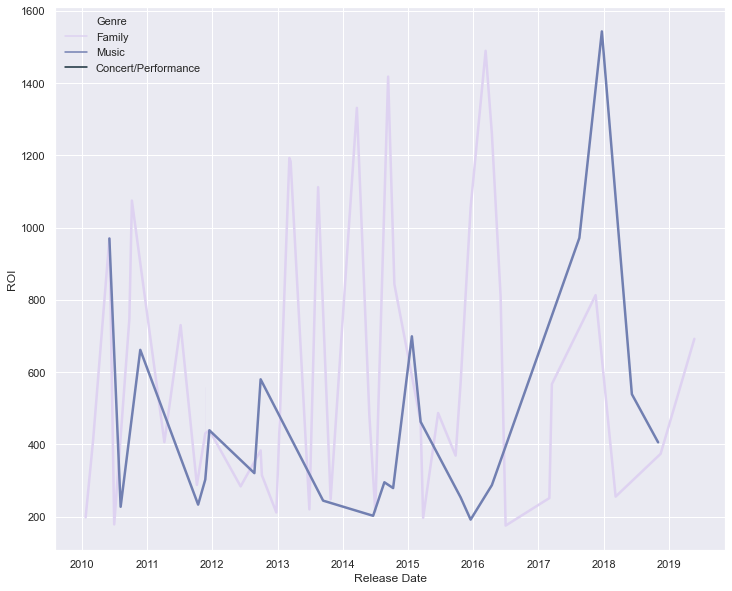

In [105]:
from numpy import median
sns.set(style="darkgrid")
plt.figure(figsize=(12,10))
sns.lineplot(x="Release Date", y="ROI",
             hue="Genre", hue_order=['Family', 'Music','Concert/Performance'],
             estimator=np.mean, err_style="band", 
             data=presentation_df, palette="ch:2.5,.25", linewidth=2.5)

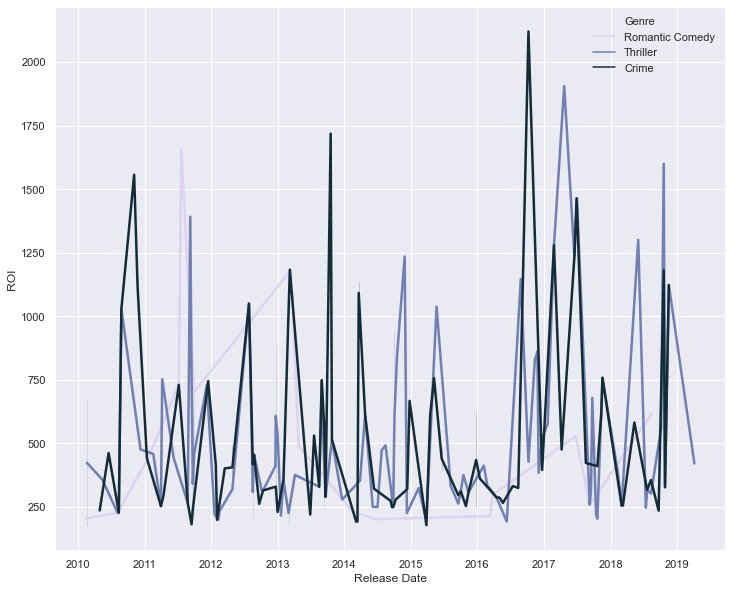

In [135]:
from numpy import median
sns.set(style="darkgrid")
plt.figure(figsize=(12,10))
sns.lineplot(x="Release Date", y="ROI",
             hue="Genre", hue_order=['Romantic Comedy', 'Thriller','Crime'],
             estimator=np.mean, err_style="band", 
             data=presentation_df, palette="ch:2.5,.25", linewidth=2.5)

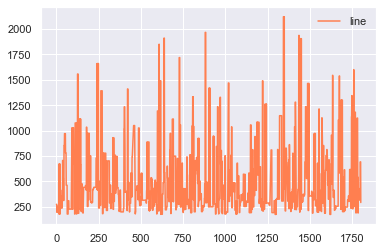

In [107]:
ax = sns.lineplot(data=presentation_df["ROI"], color="coral", label="line")

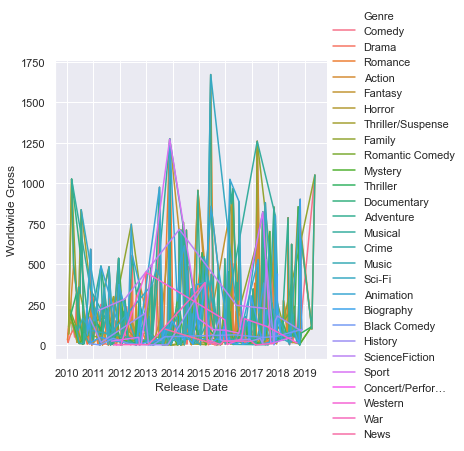

In [108]:
g = sns.relplot(x="Release Date", y="Worldwide Gross",
                hue="Genre",
                 kind="line", dashes=False,
                data=presentation_df)

In [109]:
#sns.catplot(x="Release Date", y="ROI", hue="Worldwide Gross",
           # col="Genre", aspect=.6,
           # kind="swarm", data=presentation_df)

In [110]:
#final_df.to_excel('MoviesDataFrame.xlsx', index=False)

In [111]:
presentation_df.describe()

,Production Budget,Domestic Gross,Foreign Gross,Worldwide Gross,ROI
count,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000
mean,49.921924,63.920366,99.335938,164.367839,504.317304
std,54.373323,87.346447,159.378110,242.031384,358.706517
min,0.100000,0.003080,0.001808,0.028864,175.093521
25%,12.000000,7.500000,6.400000,16.638300,255.563607
50%,30.000000,34.531832,28.400000,65.532491,357.129151
75%,63.500000,80.400000,107.987756,197.588480,620.791223
max,300.000000,652.300000,1018.130012,1671.713208,2120.029265
